In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

Shape of the dataset: (11000, 20)

Column Names:
 ['Transaction_Date', 'Price', 'Transaction_Type', 'Property_Type', 'Area_sqft', 'Location', 'Floor', 'Age_of_Property', 'Number_of_Rooms', 'Number_of_Bathrooms', 'Amenities', 'Orientation', 'Condition', 'Inflation_Rate', 'Interest_Rate', 'Exchange_Rate', 'Economic_Condition', 'Crime_Rate', 'Region_Average_Price', 'Days_on_Market']

First 5 Rows of the Dataset:
                 Transaction_Date       Price Transaction_Type Property_Type  \
0  2019-01-01 00:00:00.000000000   9889249.0             Sale     Apartment   
1  2019-01-01 04:22:49.576957695  10738782.0             Rent         Villa   
2  2019-01-01 08:45:39.153915391   1415852.0             Rent          Land   
3  2019-01-01 13:08:28.730873087   8080210.0             Sale         Villa   
4  2019-01-01 17:31:18.307830783   8061054.0              NaN     Penthouse   

   Area_sqft        Location  Floor  Age_of_Property  Number_of_Rooms  \
0     5940.0  Downtown Dubai   13.0   

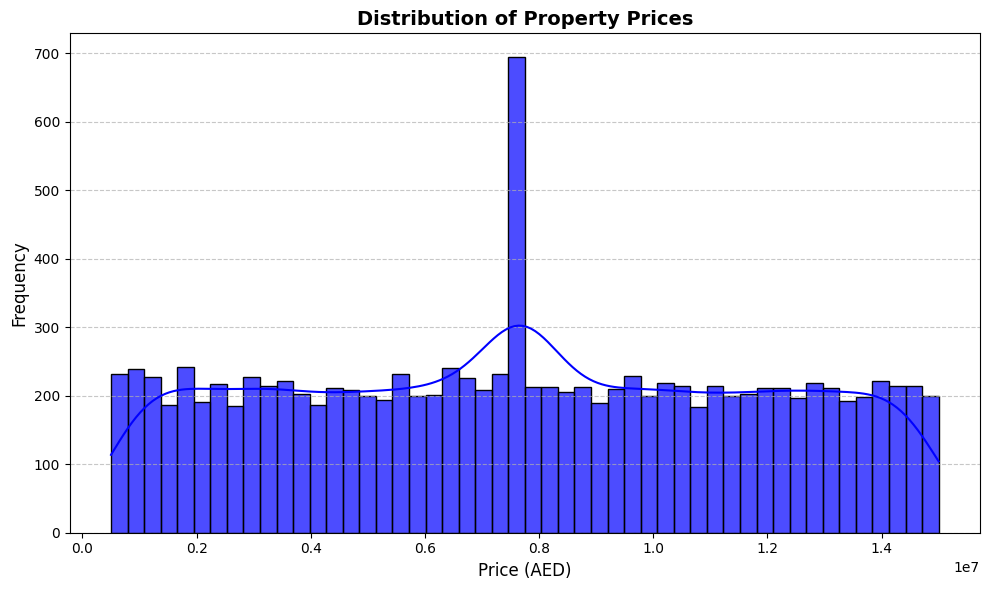

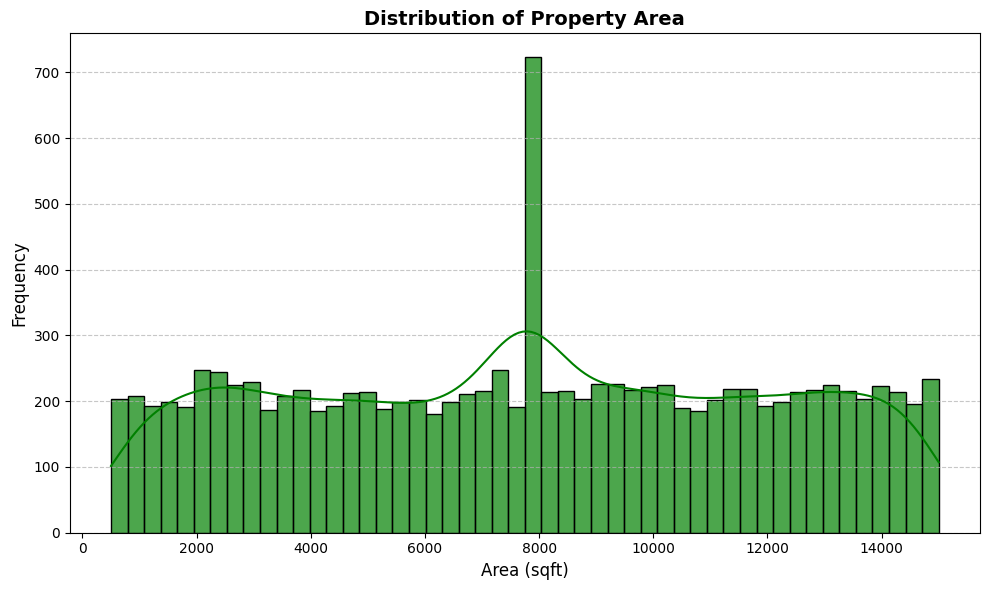

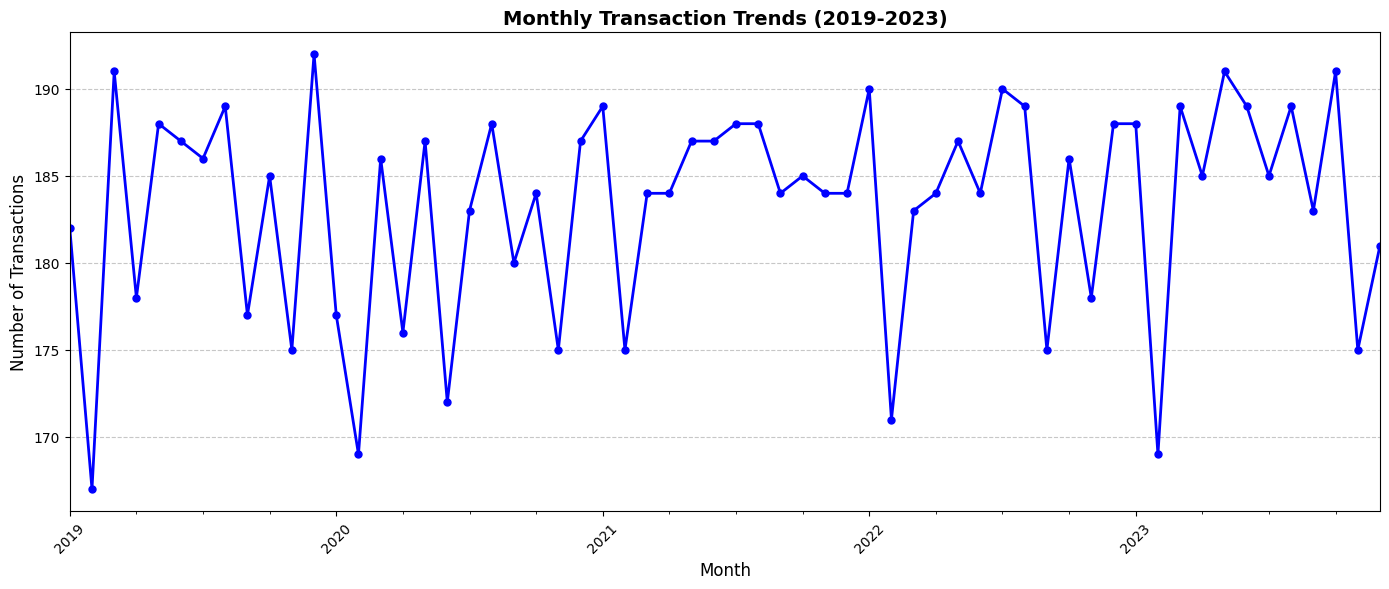

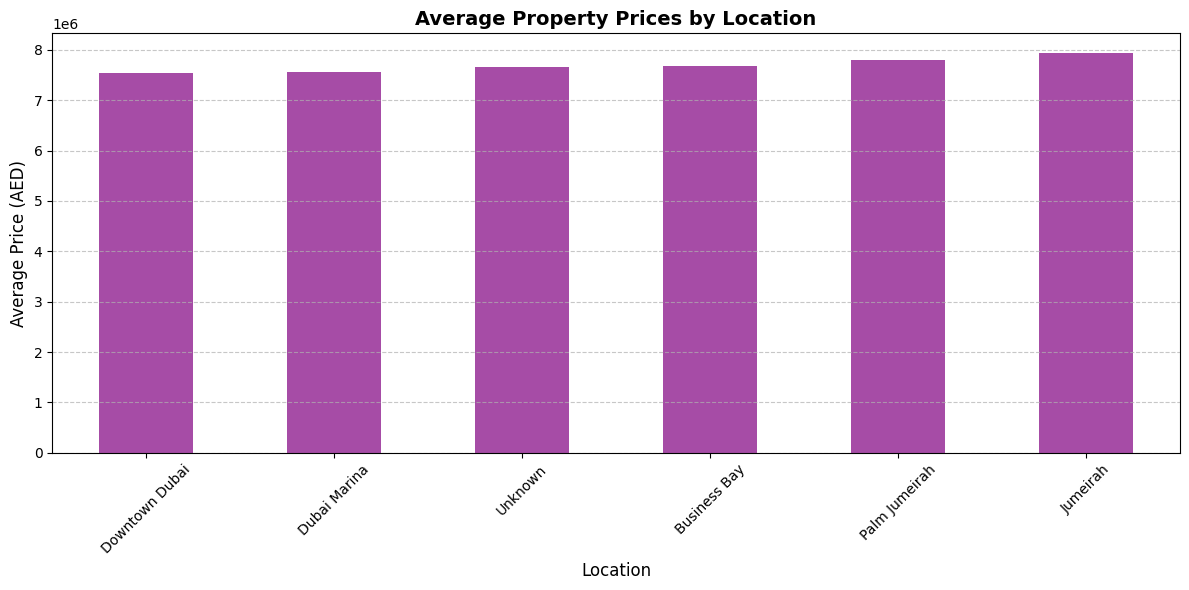

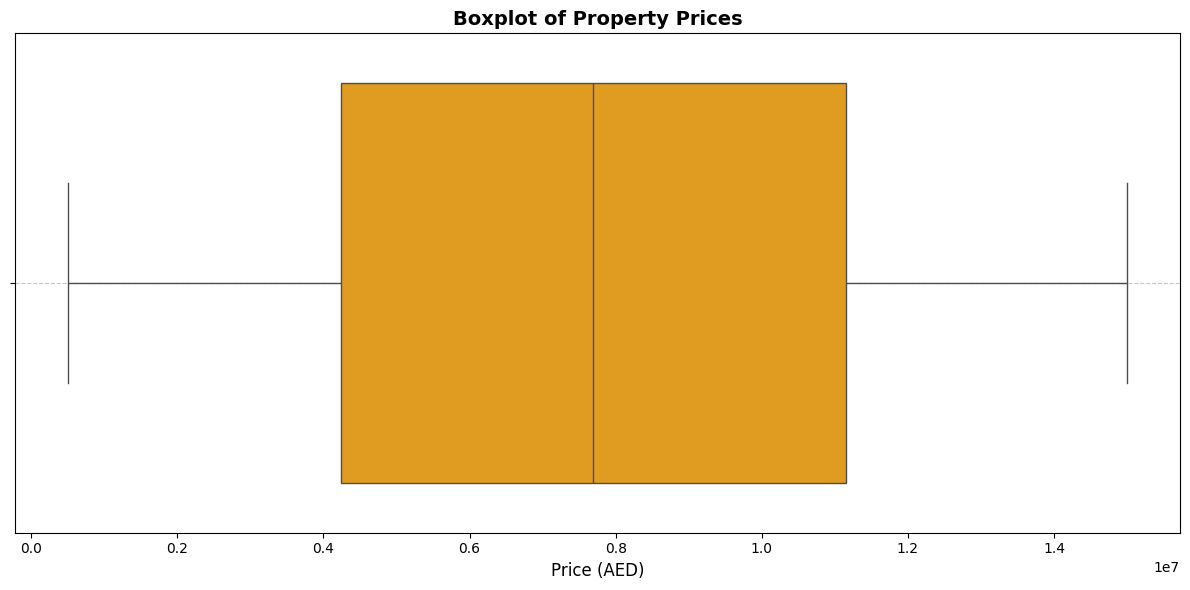

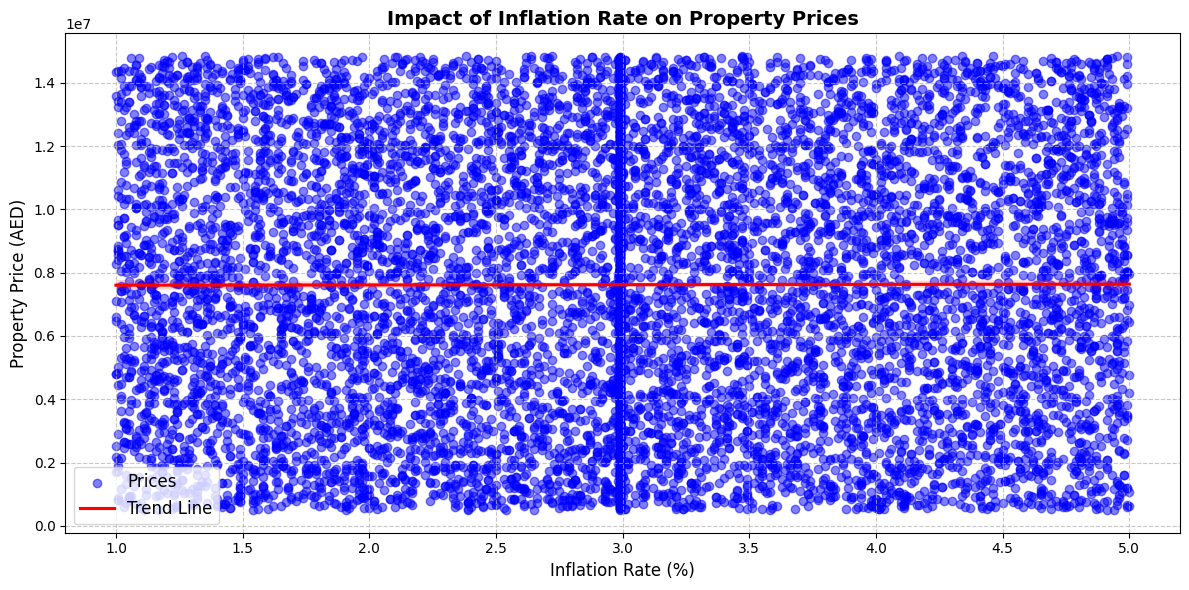

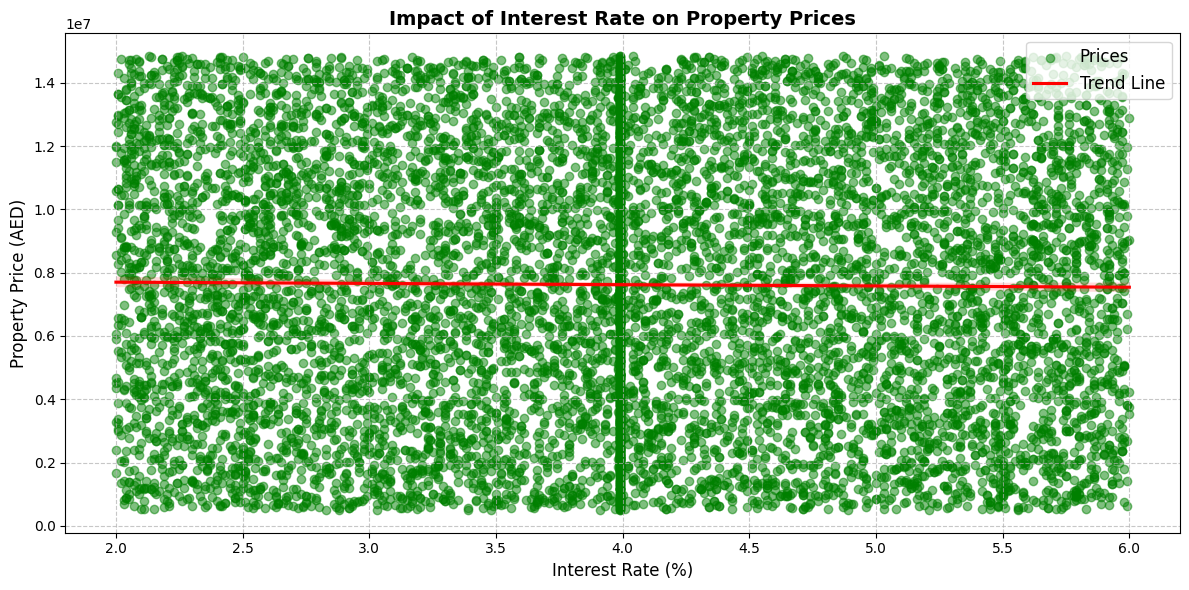

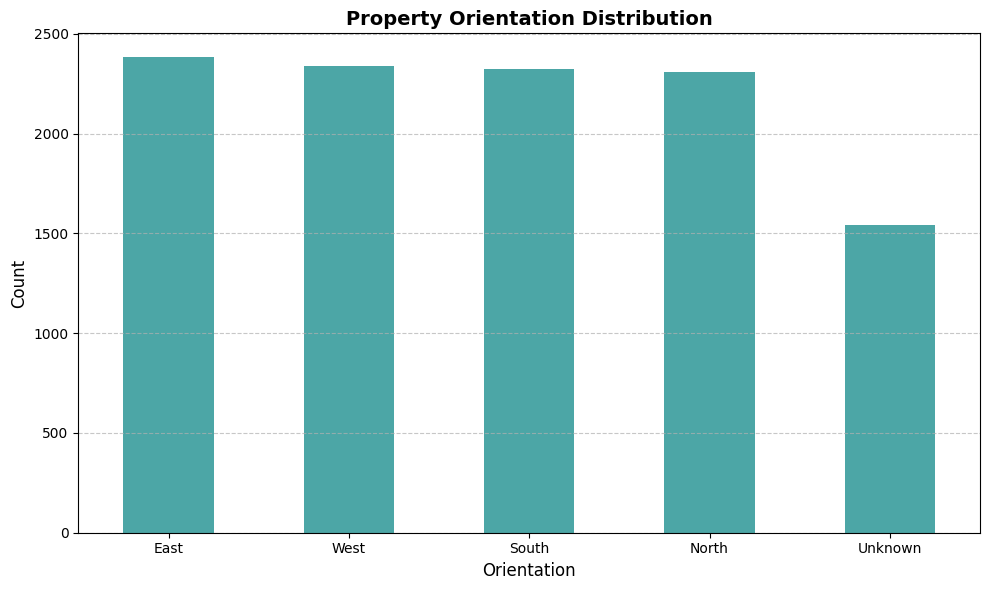

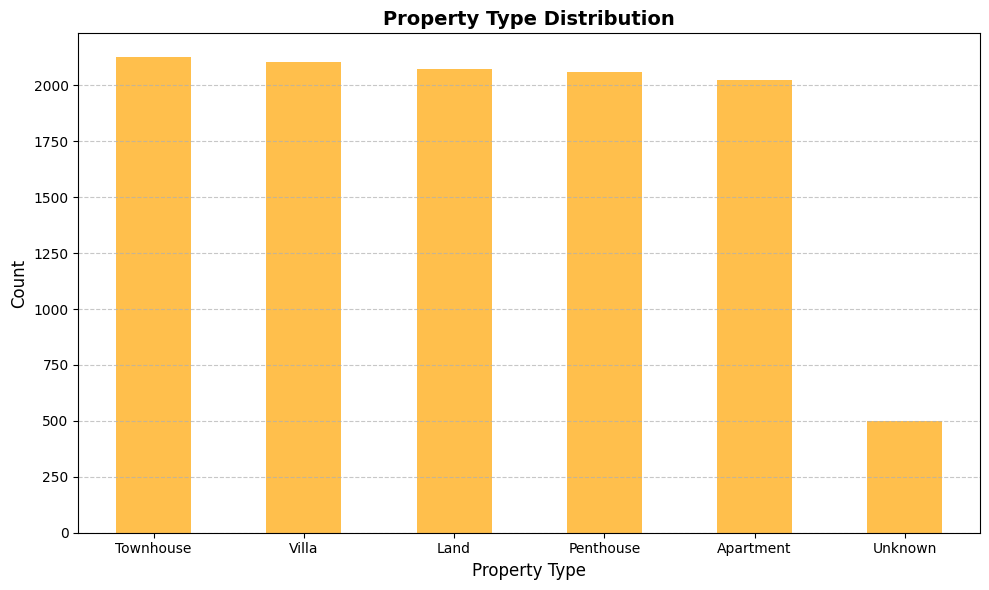

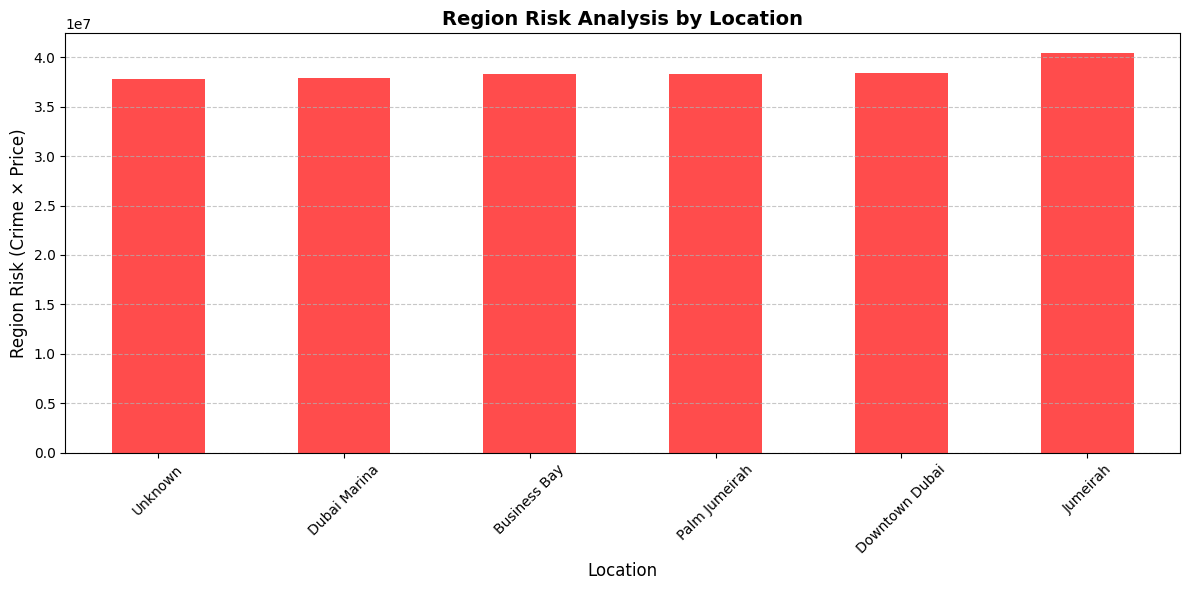

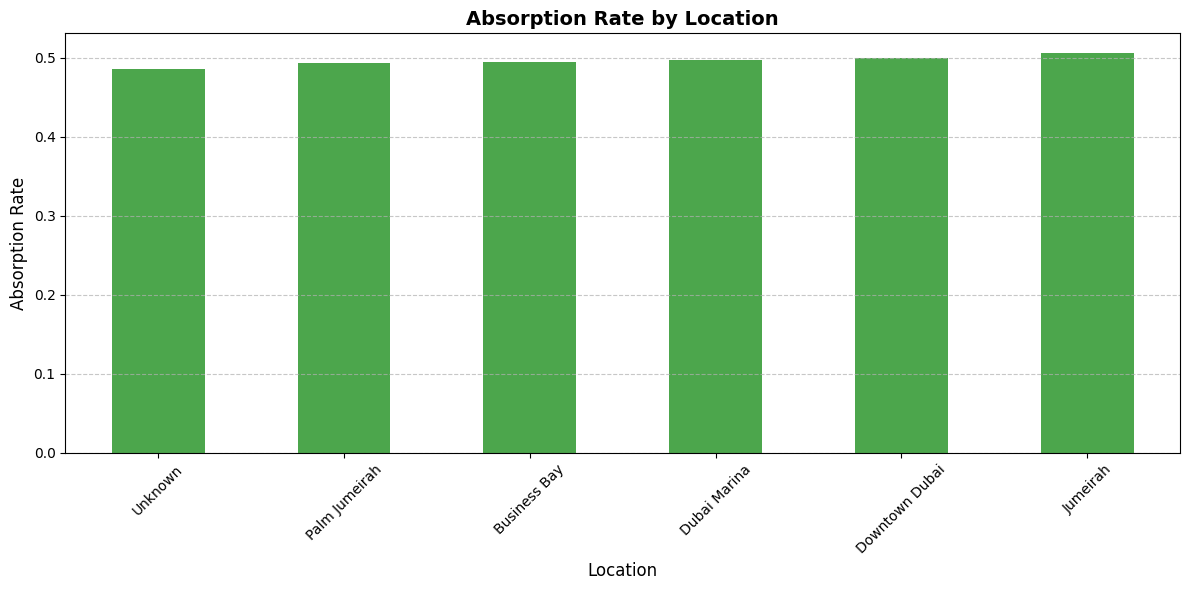

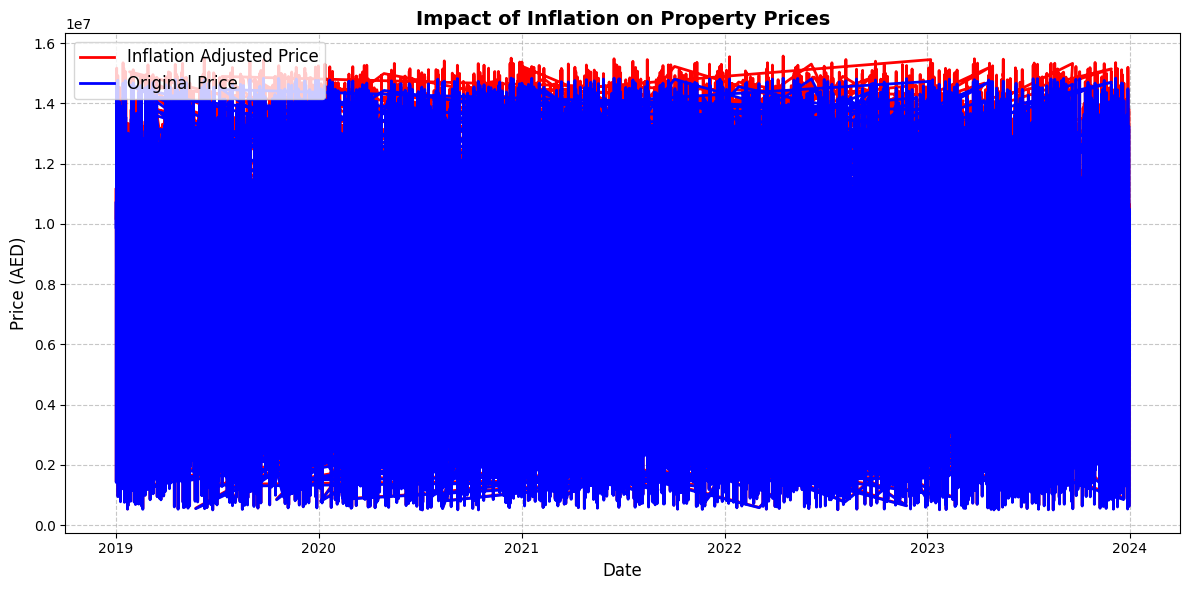

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Highly_Realistic_Dubai_Real_Estate_Dataset_with_Issues.csv"
df = pd.read_csv(file_path)

print("Shape of the dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nFirst 5 Rows of the Dataset:\n", df.head())
print("\nData Types:\n", df.dtypes)

missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

categorical_columns = df.select_dtypes(include=["object"]).columns
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

print("\nDescriptive Statistics:\n", df.describe(include="all"))

plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=50, kde=True, color="blue", alpha=0.7)
plt.title("Distribution of Property Prices", fontsize=14, fontweight='bold')
plt.xlabel("Price (AED)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df["Area_sqft"], bins=50, kde=True, color="green", alpha=0.7)
plt.title("Distribution of Property Area", fontsize=14, fontweight='bold')
plt.xlabel("Area (sqft)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], errors="coerce")
monthly_transactions = df.groupby(df["Transaction_Date"].dt.to_period("M")).size()

plt.figure(figsize=(14, 6))
monthly_transactions.plot(kind="line", color="blue", marker='o', linewidth=2, markersize=5)
plt.title("Monthly Transaction Trends (2019-2023)", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

location_avg_price = df.groupby("Location")["Price"].mean()

plt.figure(figsize=(12, 6))
location_avg_price.sort_values().plot(kind="bar", color="purple", alpha=0.7)
plt.title("Average Property Prices by Location", fontsize=14, fontweight='bold')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Average Price (AED)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Price"], color="orange")
plt.title("Boxplot of Property Prices", fontsize=14, fontweight='bold')
plt.xlabel("Price (AED)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

price_threshold = df["Price"].quantile(0.99)
df = df[df["Price"] <= price_threshold]

plt.figure(figsize=(12, 6))
plt.scatter(df["Inflation_Rate"], df["Price"], alpha=0.5, color="blue", label="Prices")
sns.regplot(x="Inflation_Rate", y="Price", data=df, scatter=False, color="red", label="Trend Line")
plt.title("Impact of Inflation Rate on Property Prices", fontsize=14, fontweight='bold')
plt.xlabel("Inflation Rate (%)", fontsize=12)
plt.ylabel("Property Price (AED)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df["Interest_Rate"], df["Price"], alpha=0.5, color="green", label="Prices")
sns.regplot(x="Interest_Rate", y="Price", data=df, scatter=False, color="red", label="Trend Line")
plt.title("Impact of Interest Rate on Property Prices", fontsize=14, fontweight='bold')
plt.xlabel("Interest Rate (%)", fontsize=12)
plt.ylabel("Property Price (AED)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

orientation_counts = df["Orientation"].value_counts()

plt.figure(figsize=(10, 6))
orientation_counts.plot(kind="bar", color="teal", alpha=0.7)
plt.title("Property Orientation Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Orientation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

property_type_counts = df["Property_Type"].value_counts()

plt.figure(figsize=(10, 6))
property_type_counts.plot(kind="bar", color="orange", alpha=0.7)
plt.title("Property Type Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df["Region_Risk"] = df["Crime_Rate"] * df["Price"]

plt.figure(figsize=(12, 6))
region_risk = df.groupby("Location")["Region_Risk"].mean().sort_values()
region_risk.plot(kind="bar", color="red", alpha=0.7)
plt.title("Region Risk Analysis by Location", fontsize=14, fontweight='bold')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Region Risk (Crime × Price)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df["Absorption_Rate"] = (df["Days_on_Market"].max() - df["Days_on_Market"]) / df["Days_on_Market"].max()

plt.figure(figsize=(12, 6))
absorption_rate_by_location = df.groupby("Location")["Absorption_Rate"].mean()
absorption_rate_by_location.sort_values().plot(kind="bar", color="green", alpha=0.7)
plt.title("Absorption Rate by Location", fontsize=14, fontweight='bold')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Absorption Rate", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df["Inflation_Adjusted_Price"] = df["Price"] * (1 + df["Inflation_Rate"] / 100)

plt.figure(figsize=(12, 6))
plt.plot(df["Transaction_Date"], df["Inflation_Adjusted_Price"], label="Inflation Adjusted Price", color="red", linewidth=2)
plt.plot(df["Transaction_Date"], df["Price"], label="Original Price", color="blue", linewidth=2)
plt.legend(fontsize=12)
plt.title("Impact of Inflation on Property Prices", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (AED)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "Highly_Realistic_Dubai_Real_Estate_Dataset_with_Issues.csv"
df = pd.read_csv(file_path)

df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_columns:
    df[col] = df[col].fillna("Unknown")

df['Price_Per_Sqft'] = df['Price'] / (df['Area_sqft'] + 1)  # Prevent division by zero
df['Market_Age_Ratio'] = df['Age_of_Property'] / (df['Days_on_Market'] + 1)
df['Amenities_Score'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))
df['Price_Volatility'] = df.groupby('Location')['Price'].std() / df.groupby('Location')['Price'].mean()
df['Price_Volatility'] = df['Price_Volatility'].fillna(0)  # Handle missing values
df['Absorption_Rate'] = (df['Days_on_Market'].max() - df['Days_on_Market']) / df['Days_on_Market'].max()
df['Region_Risk'] = df['Crime_Rate'] * df['Price']
df['Inflation_Adjusted_Price'] = df['Price'] * (1 + df['Inflation_Rate'] / 100)

df.fillna(0, inplace=True)  # Replace all remaining NaN with 0

features_to_normalize = [
    'Price_Per_Sqft', 'Market_Age_Ratio', 'Amenities_Score',
    'Price_Volatility', 'Absorption_Rate', 'Region_Risk', 'Inflation_Adjusted_Price'
]

for feature in features_to_normalize:
    if df[feature].max() - df[feature].min() == 0:  # Prevent division by zero
        df[feature] = 0
    else:
        df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

df['Risk_Score'] = (
    (df['Inflation_Rate'] * 0.2) +
    (df['Interest_Rate'] * 0.15) +
    ((df['Days_on_Market'] / df['Days_on_Market'].max()) * 0.15) +
    (df['Price_Per_Sqft'] * 0.1) +
    ((1 - df['Amenities_Score']) * 0.05) +
    ((1 - df['Market_Age_Ratio']) * 0.05) +
    (df['Price_Volatility'] * 0.1) +
    ((1 - df['Absorption_Rate']) * 0.1) +
    (df['Region_Risk'] * 0.1) +
    (df['Crime_Rate'] * 0.15)  # Direct impact of crime rate
)

if df['Risk_Score'].max() - df['Risk_Score'].min() == 0:  # Prevent division by zero
    df['Risk_Score'] = 0
else:
    df['Risk_Score'] = (df['Risk_Score'] - df['Risk_Score'].min()) / (df['Risk_Score'].max() - df['Risk_Score'].min())

bins = [0, 0.33, 0.66, 1.0]
labels = ['Low Risk', 'Medium Risk', 'High Risk']
df['Risk_Cluster_Label'] = pd.cut(df['Risk_Score'], bins=bins, labels=labels, include_lowest=True)

output_file = 'new_Corrected_Risk_Score_and_Clusters.csv'
df.to_csv(output_file, index=False)
print(f"Dataset saved to {output_file} with Risk_Score and Risk_Cluster_Label.")

print("Sample Risk_Score and Risk_Cluster_Label:")
print(df[['Risk_Score', 'Risk_Cluster_Label']].head())


Dataset saved to new_Corrected_Risk_Score_and_Clusters.csv with Risk_Score and Risk_Cluster_Label.
Sample Risk_Score and Risk_Cluster_Label:
   Risk_Score Risk_Cluster_Label
0    0.639674        Medium Risk
1    0.704260          High Risk
2    0.605168        Medium Risk
3    0.378737        Medium Risk
4    0.554615        Medium Risk
